__ECCOL - Enhancing Collaboration and Communication in Online Learning through AI and ML(AI for society)__
---
*Objective:*
The objective of this project is to improve the trust and bring transparency in farmer supply chains using environmental data and advanced technologies. All the datasets taken in this projects have been credited in this notebook.

----
Made by Ritvik Sarswat for RIC Hack Conclave Challenge Taken - Encouraging Parental Involvement in a Child's Education:.The objective of this project is to develop an AI-driven platform that fosters active parental involvement in
their child's educational journey. By leveraging machine learning models, the platform will provide personalized insights into a child's academic performance, highlight areas where parental support can make the most impact, and
facilitate effective communication between parents, teachers, and students

In [3]:
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from imblearn import over_sampling
import tensorflow as tf
from flask import Flask, request, jsonify

__DATASET:__
__Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository.__

https://doi.org/10.24432/C5TG7T.

----
Dataset Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic,
social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the
performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were
modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with
attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and
2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

----

In [4]:
df = pd.read_csv("student-mat.csv", sep=';')
i = df[(df.G1 > 10) & (df.G2 > 10) & (df.G3 > 10)].index
df.drop(i, inplace=True)
col_of_interest = ["studytime", "traveltime", "freetime", "goout", "absences", "health", "failures", "G1", "G2", "G3"]
df = df[col_of_interest]
df = df.reset_index()
print(df)

     index  studytime  traveltime  freetime  goout  absences  health  \
0        0          2           2         3      4         6       3   
1        1          2           1         3      3         4       3   
2        2          2           1         3      2        10       3   
3        4          2           1         3      2         4       5   
4        7          2           2         1      4         6       1   
..     ...        ...         ...       ...    ...       ...     ...   
215    389          2           2         1      1         0       5   
216    390          2           1         5      4        11       4   
217    392          1           1         5      3         3       3   
218    393          1           3         4      1         0       5   
219    394          1           1         2      3         5       5   

     failures  G1  G2  G3  
0           0   5   6   6  
1           0   5   5   6  
2           3   7   8  10  
3           0   6  10  

## Model Training

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = over_sampling.RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y,(-1, 1))))
  return data, x, y

/Users/rajesh/.pyenv/versions/3.11.4/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
train, x_train, y_train = scale_dataset(train, oversample=True)
test, x_test, y_test = scale_dataset(test, oversample=False)
y_train_shape = tf.shape(y_train)
batch_size = y_train_shape[0]

## Explanatory Data Amalysis(EDA):Plotting the data of final grades


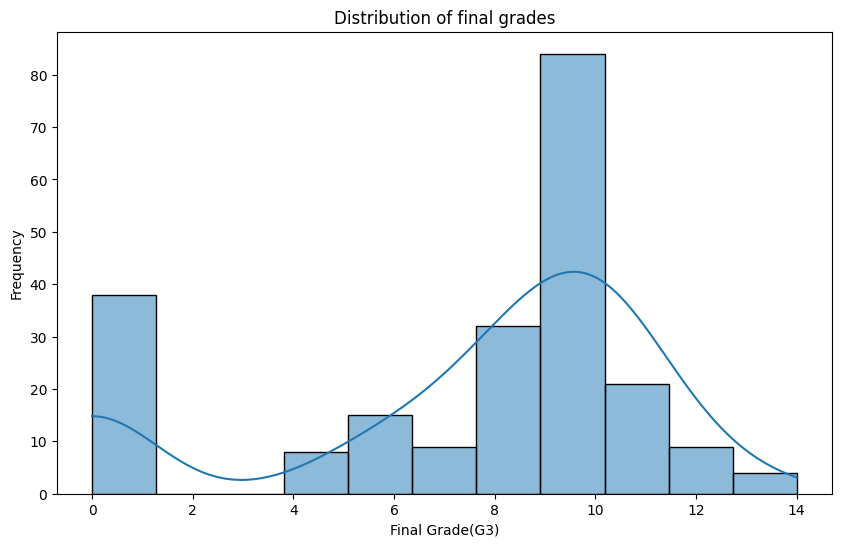

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['G3'], kde=True)
plt.title('Distribution of final grades')
plt.xlabel('Final Grade(G3)')
plt.ylabel('Frequency')
plt.show()

## Correlation Matrix


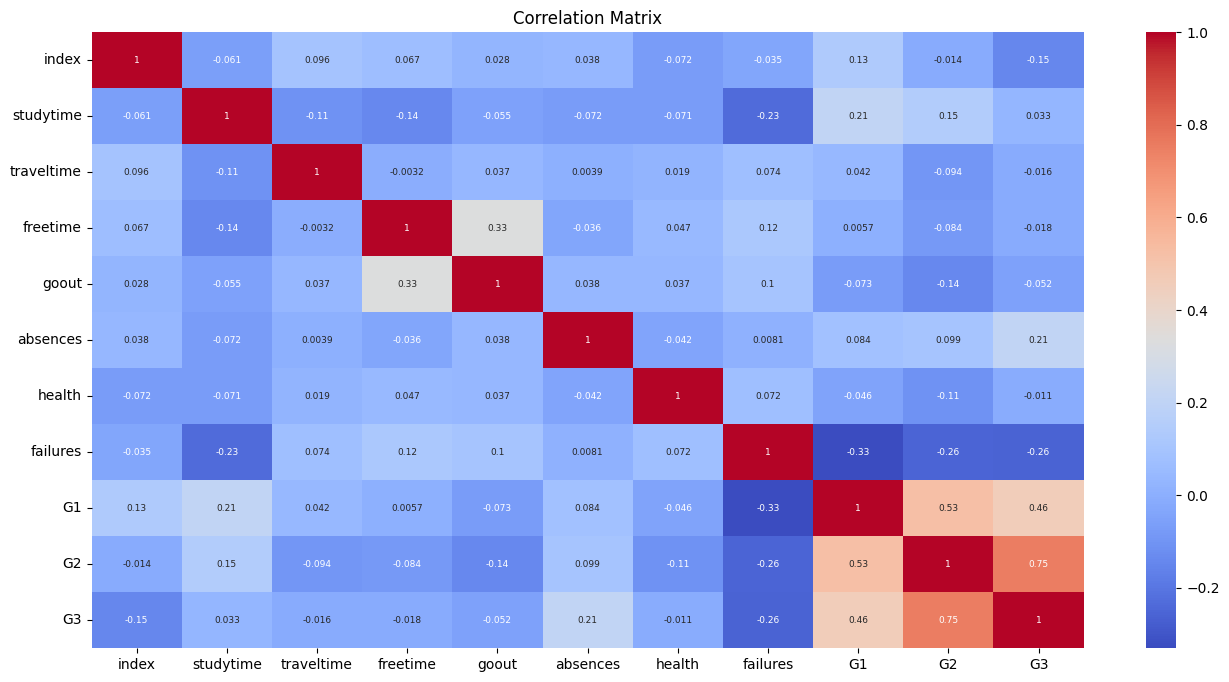

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':6.5}, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Collaborative Patterns Analysis


In [9]:
features = ["studytime", "traveltime", "freetime", "goout", "absences", "health", "failures", "G1", "G2"]
X = df[features]
y = df['G3']

In [10]:
X_scaled = StandardScaler().fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=10) # Splitting into 70% train, 30% temp
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10) # Further splitting temp into 15% validation, 15% test

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.fit_transform(X)
x_train = X_train[:len(y_train)]
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Data Model using Random Forest Regressor


In [13]:
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
X = df[features]
y = df['G3']

with open("scaler.pkl", "rb") as s:
    scaler = pickle.load(s)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature Importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Mean Squared Error (MSE): 5.92
R-squared (R2): 0.59

Feature Importance:
     Feature  Importance
2   absences    0.487580
4         G2    0.421889
3         G1    0.041814
0  studytime    0.028636
1   failures    0.020080
